# Importing the libraries

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

# Loading the dataset

In [2]:
# Importing the dataset

dataset = pd.read_csv('Wholesale customers data.csv')
dataset.shape
dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Missing data & Type of variables

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Analysis:

In [5]:
# Transforming specific variables into categorical variables

dataset['Channel'] = dataset['Channel'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


# Data pre-processing for model

In [6]:
# Customer Segmentation by $ Revenue & Country

X = dataset
num_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Creating dummy variables for categorical types
cat_cols = ["Channel", "Region"]
dummies = pd.get_dummies(X[cat_cols])
# dummies.head(5)

# Combining dummy variables and numeric varianbles

X1 = X[num_cols]
X2 = pd.concat([dummies, X1], axis=1)
X = X2

y = dataset["Frozen"]

# Splitting the dataset into the training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head(5)

X_test0 = X_test
y_test0 = y_test

# Principal component analysis

In [7]:
# Checking the variance explained by each principal component

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068103,
 0.40473044136593744,
 0.06915995278940268,
 0.0377564565310207,
 0.01603191921308992,
 0.006363379487508994,
 8.365303815710361e-10,
 6.566091152558098e-10,
 3.292197502735766e-10,
 1.11299085090118e-34,
 3.319471567360467e-36]

In [8]:
# Analysis: WE shall choose the top 2 principal components.
# The top 2 principal components explain 86 % variance in the dataset. 
# Beyond the top 2, the marginial gain in variance for adding each principal componenet is significantly reduced.

# Selecting the top 2 principal components

In [9]:
# Principal component analysis to take the 2 top components

i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.46595784879068103, 0.40473044136593744]

# Customer segmentation

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


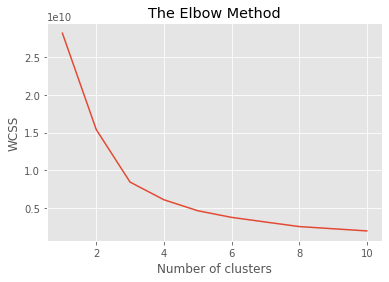

In [10]:
# # Elbow method used for customer segmentation based on the top 2 principal componenets


# # Using the elbow method to find the optimal number of clusters
# K_values = range(2, 16)
# from sklearn.cluster import KMeans
# wcss = []
# for i in K_values:
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X_test)
#     wcss.append(kmeans.inertia_)
# plt.plot(K_values, wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Identify the optimal K using the "elbow" method
# diff = np.diff(wcss)
# k_optimal = K_values[np.argmin(diff) + 1]

# print(f"The optimal number of clusters (K) is: {k_optimal}")



# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Analysis:
# Based on the above diagram, the optimal number of customer segmenets is 3. 
# After the first 3 segments, the incremental drop in error for every additional segment results is significantly reduced.

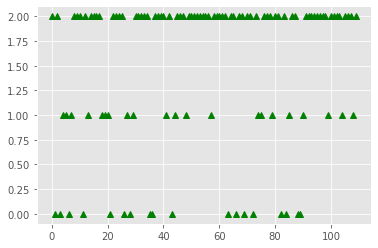

In [12]:
# Fitting K-Means to the dataset
X3 = X_test
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
plt.plot(y_kmeans, 'g^')
plt.show()

# Visualizing customer segments

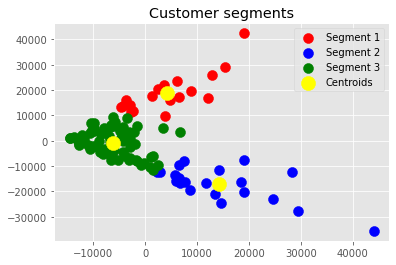

In [13]:
# Visualising the clusters
plt.scatter(X3[y_kmeans == 0, 0], X3[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(X3[y_kmeans == 1, 0], X3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Segment 2')
plt.scatter(X3[y_kmeans == 2, 0], X3[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()



# Analysis:
# There are some overlap between segment No. 3 with each of Segment No. 1 & 2 at the boundaries which we need to keep in mind while analyzing customers.

# The k-means clustering algorithm being a un-supervised learning algorithm, we can perform a quick visual check on the model's performance based on the visualization chart.

# Customer Segments

In [14]:
Customer_segment_class = pd.DataFrame(y_kmeans)
Customer_segment_class.columns = ["Customer_segment_class"]
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis = 1)
# Customer_segments.head(5)

In [15]:
# 1st Cluster
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

# 2nd Cluster
mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

# 3rd Cluster
mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

# Customer Segment Features

In [16]:
# Regions & Channel
Customer_segments_1.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_2.groupby(["Channel_1", "Channel_2"]).size()
Customer_segments_3.groupby(["Channel_1", "Channel_2"]).size()

Channel_1  Channel_2
0          1            19
1          0            52
dtype: int64

In [17]:
Customer_segments_1.groupby(["Region_1", "Region_2", "Region_3"]).size()
Customer_segments_2.groupby(["Region_1", "Region_2", "Region_3"]).size()
Customer_segments_3.groupby(["Region_1", "Region_2", "Region_3"]).size()

Region_1  Region_2  Region_3
0         0         1           52
          1         0            8
1         0         0           11
dtype: int64

# Fresh, Milk & Grocery

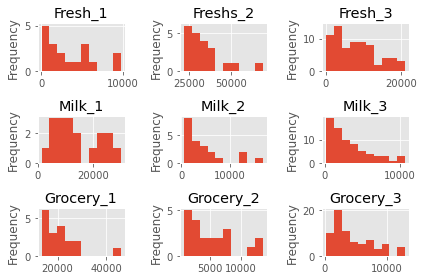

In [18]:
# Fresh

plt.subplot(331)
plt.title('Fresh_1')
Output = None
Customer_segments_1["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Freshs_2')
Output = None
Customer_segments_2["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Fresh_3')
Output = None
Customer_segments_3["Fresh"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Milk

plt.subplot(334)
plt.title('Milk_1')
Output = None
Customer_segments_1["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Milk_2')
Output = None
Customer_segments_2["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Milk_3')
Output = None
Customer_segments_3["Milk"].plot(kind = "hist", bins = 10)
plt.tight_layout()



# Grocery

plt.subplot(337)
plt.title('Grocery_1')
Output = None
Customer_segments_1["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Grocery_2')
Output = None
Customer_segments_2["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Grocery_3')
Output = None
Customer_segments_3["Grocery"].plot(kind = "hist", bins = 10)
plt.tight_layout()



# Fresh: Segment # 2 makes significant purchases compared to other segments folloewed by Segment # 3

# Milk: Segment # 1 makes significant purchases compared to other segments

# Grocery: Segnment # 1 makes significant purchases compared to other segments

# Frozen, Detergent Paper & Delicassen


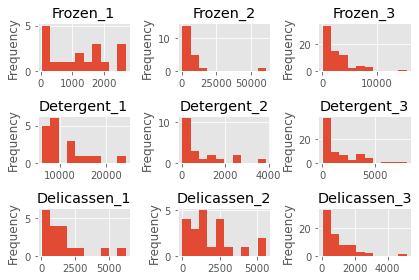

In [19]:
# Frozen

plt.subplot(331)
plt.title('Frozen_1')
Customer_segments_1["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Frozen_2')
Customer_segments_2["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Frozen_3')
Customer_segments_3["Frozen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Detergent Paper

plt.subplot(334)
plt.title('Detergent_1')
Customer_segments_1["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Detergent_2')
Customer_segments_2["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Detergent_3')
Customer_segments_3["Detergents_Paper"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Delicassen

plt.subplot(337)
plt.title('Delicassen_1')
Customer_segments_1["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Delicassen_2')
Customer_segments_2["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Delicassen_3')
Customer_segments_3["Delicassen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

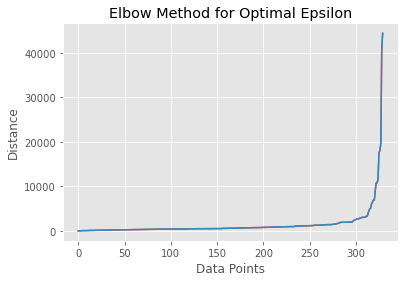

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Find optimal epsilon using NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# Find optimal epsilon using Elbow Method
plt.plot(np.arange(len(distances)), distances)
plt.title("Elbow Method for Optimal Epsilon")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



In [22]:
# Based on the plot, choose epsilon value
epsilon = 0.5  # choose based on elbow point

# Find optimal min_samples using silhouette_score
silhouette_scores = []
min_samples_range = range(2, 11)
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    dbscan.fit(X_train)
    if len(np.unique(dbscan.labels_)) > 1:
        silhouette_scores.append(silhouette_score(X_train, dbscan.labels_))
    else:
        silhouette_scores.append(-1)  # silhouette score not applicable



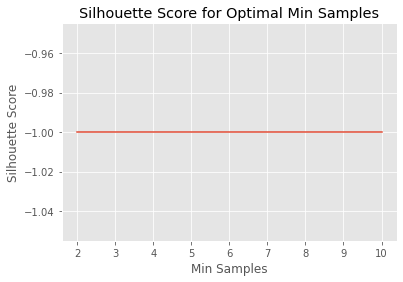

In [23]:
# Plot silhouette scores
plt.plot(min_samples_range, silhouette_scores)
plt.title("Silhouette Score for Optimal Min Samples")
plt.xlabel("Min Samples")
plt.ylabel("Silhouette Score")
plt.show()



In [24]:
# Choose min_samples with highest silhouette score
optimal_min_samples = min_samples_range[np.argmax(silhouette_scores)]

# Fit DBSCAN with optimal epsilon and min_samples
dbscan = DBSCAN(eps=epsilon, min_samples=optimal_min_samples)
dbscan.fit(X_train)


DBSCAN(min_samples=2)

In [25]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f'Number of clusters: {n_clusters_}')

# Assign clusters to test data
test_labels = dbscan.fit_predict(X_test)
test_labels

Number of clusters: 0


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

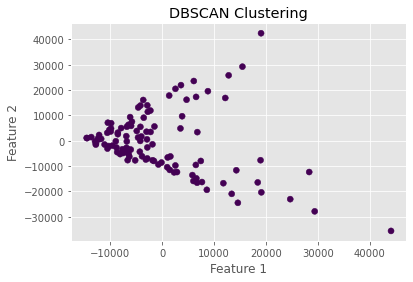

In [26]:
# Visualize clusters (if 2D data)
if X_train.shape[1] == 2:
    plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('DBSCAN Clustering')
    plt.show()

# Now you can proceed with analyzing the clusters and their characteristics.